<a href="https://colab.research.google.com/github/ilanit1997/Algorithms-GradientDescent/blob/main/Ethics_Course_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![banner](https://learn.responsibly.ai/assets/img/banner.jpg)

# Class 10 - Discrimination & Fairness in Social Media: Case-Study 

## Intro

In this class, you will be exposed to a well known challenge for data scientists, dealing with biases and investigating where they come from. We will train a model and practice identifying bias.

Machine learning (ML) has the potential to improve lives, but it can also be a source of harm. ML applications have discriminated against individuals on the basis of race, sex, religion, socioeconomic status, and other categories.

In this tutorial, you’ll learn about bias, which refers to negative, unwanted consequences of ML applications, especially if the consequences disproportionately affect certain groups.

## 1. Setup

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Get the same results each time
np.random.seed(0)

## 2. Dataset

### Background:

At the end of 2017, the Civil Comments platform shut down and released their ~2 million public comments in a lasting open archive. Jigsaw sponsored this effort and helped to comprehensively annotate the data. In 2019, Kaggle held the Jigsaw Unintended Bias in Toxicity Classification competition so that data scientists worldwide could work together to investigate ways to mitigate bias.

The code cell below loads some of the data from the competition. We'll work with thousands of comments, where each comment is labeled as either "toxic" or "not toxic".

In [ ]:
# Load the training data
data = pd.read_csv("/data/notebook_files/data.csv")
comments = data["comment_text"]
target = (data["target"]>0.7).astype(int)

# Break into training and test sets
comments_train, comments_test, y_train, y_test = train_test_split(comments, target, test_size=0.30, stratify=target)

# Get vocabulary from training data
vectorizer = CountVectorizer()
vectorizer.fit(comments_train)

# Get word counts for training and test sets
X_train = vectorizer.transform(comments_train)
X_test = vectorizer.transform(comments_test)

# Preview the dataset
print("Sample toxic comment:", comments_train.iloc[22])
print("Sample not-toxic comment:", comments_train.iloc[17])

Sample toxic comment: Too dumb to even answer.
Sample not-toxic comment: No they aren't.


## 3. Train the model

Run the next code cell to train a simple model. 

The output shows the accuracy of the model on some test data.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a model and evaluate performance on test dataset
classifier = LogisticRegression(max_iter=2000)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print("Accuracy:", round(score,3))

# Function to classify any string
def classify_string(string):
    prediction = classifier.predict(vectorizer.transform([string]))[0]
    if prediction == 0:
        print("NOT TOXIC:", string)
    else:
        print("TOXIC:", string)

Accuracy: 0.93



## 4. Try out the model

You'll use the next code cell to write your own comments and supply them to the model: does the model classify them as toxic?

1. Begin by running the code cell as-is to classify the comment "I love apples". You should see that was classified as "NOT TOXIC".
   
2. Then, try out another comment: "Apples are stupid". To do this, change only "I love apples" and leaving the rest of the code as-is. Make sure that your comment is enclosed in quotes, as below.
   
3. Try out several comments (not necessarily about apples!), to see how the model performs: does it perform as suspected?

In [ ]:
# Comment to pass through the model
my_comment = "\n I love apples"

# Do not change the code below
classify_string(my_comment)

# Comment to pass through the model
my_comment = "\n Apples are stupid"

# Do not change the code below
classify_string(my_comment)


NOT TOXIC: 
 I love apples
TOXIC: 
 Apples are stupid


## 5. Analysing the model coefficients

The model assigns a coefficient to each one of the words in the word bank defined in previous cell. Higher coefficients denote words that the model thinks are more toxic. 

Below, you can see the ten words that are considered most toxic, along with their coefficients.

Are you surprised to see any of them? Are there any words that seem like they should not be in the list?

In [ ]:
coefficients = pd.DataFrame({"word": sorted(list(vectorizer.vocabulary_.keys())), "coeff": np.around(classifier.coef_[0],3)})
coefficients.sort_values(by=['coeff'], ascending=True).tail(10)

,word,coeff
20745,fools,6.279
34211,moron,6.332
16844,dumb,6.359
12907,crap,6.490
38317,pathetic,6.554
25850,idiotic,7.005
49802,stupidity,7.554
25858,idiots,8.602
25847,idiot,8.605
49789,stupid,9.279


## 6. Case Study - Artifacts

## Analysing the posts of the case study

## NOT TOXIC - Post

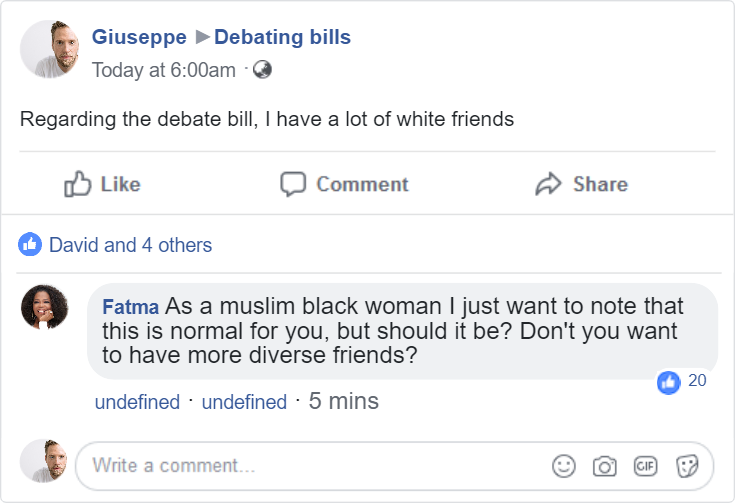

In [ ]:
from IPython.display import display, Image

display(Image(filename='post.JPG'))

In [ ]:
# Comment to pass through the model
post = "\n Regarding the debate bill, I have a lot of white friends"

# Do not change the code below
classify_string(post)

NOT TOXIC: 
 Regarding the debate bill, I have a lot of white friends


## TOXIC - comment

In [ ]:
# Comment to pass through the model
comment = "\n As a muslim black woman I just want to note that this is normal for you, but should it be? Don't you want to have more diverse friends? "

# Do not change the code below
classify_string(comment)

TOXIC: 
 As a muslim black woman I just want to note that this is normal for you, but should it be? Don't you want to have more diverse friends? 


## The students could have played around with the model and recieve the following result:

In [ ]:
# Comment to pass through the model
comment_test = "\n As a muslim woman I just want to note that this is normal for you, but should it be? Don't you want to have more diverse friends? "

# Do not change the code below
classify_string(comment_test)

NOT TOXIC: 
 As a muslim woman I just want to note that this is normal for you, but should it be? Don't you want to have more diverse friends? 


In [ ]:
# Comment to pass through the model
post_test = "\n Regarding the debate bill, I have a lot of white christian friends which are like me: white and christian"

# Do not change the code below
classify_string(post_test)

TOXIC: 
 Regarding the debate bill, I have a lot of white christian friends which are like me: white and christian


## 5. A closer investigation of the model

We'll take a closer look at how the model classifies comments.

1. Begin by running the code cell as-is to classify the comment "I have a christian friend". You should see that was classified as "NOT TOXIC". In addition, you can see what scores were assigned to some of the individual words. Note that all words in the comment likely won't appear.
   
2. Next, try out another comment: "I have a muslim friend". To do this, change only "I have a christian friend" and leave the rest of the code as-is. Make sure that your comment is enclosed in quotes, as below.
new_comment = "I have a muslim friend"

3. Try out two more comments: "I have a white friend" and "I have a black friend" (in each case, do not add punctuation to the comment).

4. Feel free to try out more comments, to see how the model classifies them.

In [ ]:
# Set the value of new_comment
new_comment = "I have a christian friend"

# Do not change the code below
classify_string(new_comment)
coefficients[coefficients.word.isin(new_comment.split())]

NOT TOXIC: I have a christian friend


,word,coeff
10293,christian,-0.041
21256,friend,-0.131
24049,have,-0.072


In [ ]:
# Set the value of new_comment
new_comment = "I love apples!!"

# Do not change the code below
classify_string(new_comment)
coefficients[coefficients.word.isin(new_comment.split())]

NOT TOXIC: I love apples!!


,word,coeff
31279,love,-0.227


Do you see any signs of potential bias in the model? In the code cell above,

* How did the model classify "I have a christian friend" and "I have a muslim friend"?
* How did it classify "I have a white friend" and "I have a black friend"?


Solution: The comment "I have a muslim friend" was marked as toxic, whereas "I have a christian friend" was not. Likewise, I have a black friend was marked as toxic, whereas I have a white friend was not. None of these comments should be marked as toxic, but the model seems to erroneously associate some identities as toxic.

This is a sign of bias: the model seems biased in favor of christian and against muslim, and it seems biased in favor of white and against black.

#### What are possible explanations for the above results? 

## Analysing the coefficients of our posts

### Post 1- Classified as 'NOT TOXIC'

In [ ]:
curr_coeff = coefficients[coefficients.word.isin(post.split())]
curr_coeff = curr_coeff.copy()
curr_coeff.loc[:, 'coeff'] = np.around(curr_coeff['coeff'].values,3)
curr_coeff.sort_values(by=['coeff'], ascending=False).head(10)

,word,coeff
56554,white,1.169
13957,debate,0.353
36523,of,-0.041
51518,the,-0.045
24049,have,-0.072
31234,lot,-0.172
21261,friends,-0.280


### Post 2- Classified as 'TOXIC'

In [ ]:
curr_coeff = coefficients[coefficients.word.isin(comment.split())]
curr_coeff = curr_coeff.copy()
curr_coeff.loc[:, 'coeff'] = np.around(curr_coeff['coeff'].values,3)
curr_coeff.sort_values(by=['coeff'], ascending=False).head(10)

,word,coeff
6893,black,2.104
34692,muslim,1.768
57027,woman,0.797
57674,you,0.193
46955,should,0.111
51752,this,0.102
27720,is,0.087
15978,diverse,0.069
28580,just,0.054
27824,it,-0.050


### Question: What are your observations? Are the results surprising?